### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [1]:
import pandas as pd

# 파일 경로
file_path = r"C:\Users\75050\Desktop\WIA\lecture Source\03_Matplotlib-main\eda_practice\data\ecommerce_sales_data.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# 상위 5개
print(df.head())

# 결측값 확인
print(df.isnull().sum())

# 결측값 처리 (여기선 DiscountRate만 결측이 있음, 0으로 대체)
df['DiscountRate'] = df['DiscountRate'].fillna(0)

print(df.dtypes)

# 컬럼명 오타(Birthdate)를 맞추기
df.rename(columns={"Birthdate":"Birthdate"}, inplace=True)

# OrderDate와 Birthdate를 datetime으로 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Birthdate'] = pd.to_datetime(df['Birthdate'])

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  DiscountRate  
0  2024-06-10 17:18      미국          0.14  
1  2023-11-18 18:45      독일          0.29  
2  2023-10-15 11:19      중국          0.23  
3   2024-07-19 2:19      일본          0.20  
4  2024-01-20 20:34    대한민국          0.09  
OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64
OrderID           int64
Product          object
Category         object
Quantity      

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

C:\Users\75050\AppData\Local\Temp\ipykernel_12792\3892284790.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['TotalRevenue'].resample('M').sum()
c:\ProgramData\miniforge3\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\miniforge3\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\miniforge3\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\miniforge3\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N

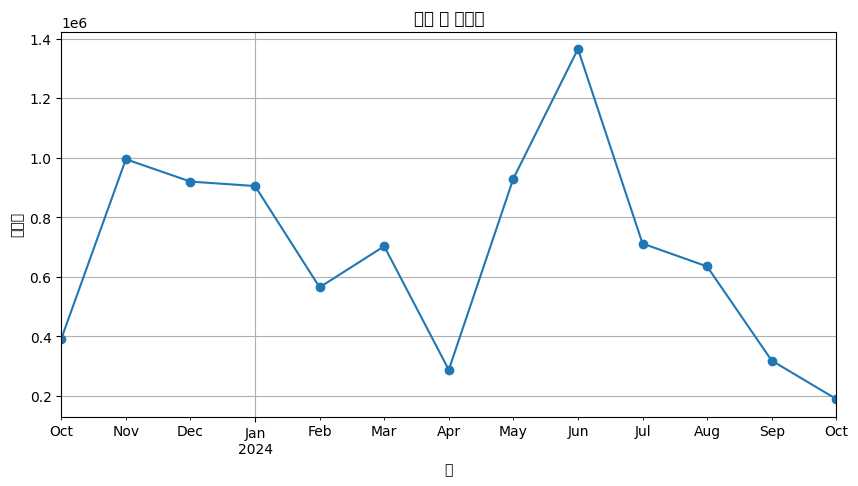

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64
Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


In [3]:
df['TotalRevenue'] = df['Quantity'] * df['Price']

import matplotlib.pyplot as plt

# 인덱스를 날짜로 설정
df.set_index('OrderDate', inplace=True)

# 월별 매출 집계
monthly_sales = df['TotalRevenue'].resample('M').sum()

# 시각화
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title('월별 총 매출액')
plt.ylabel('매출액')
plt.xlabel('월')
plt.grid(True)
plt.show()

# 인덱스 리셋(추가 분석 위해)
df.reset_index(inplace=True)

cat_sales = df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False)
print(cat_sales.head(3))

country_sales = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)
print(country_sales.head(5))

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [5]:
cust_sales = df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False)
print(cust_sales.head(5))

order_count = df.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False)
print(order_count.head(5))

import numpy as np

# 연령 계산
reference_date = pd.Timestamp('2024-01-01')  # 기준일 임의 지정
df['Age'] = (reference_date - df['Birthdate']).dt.days // 365

# 연령대 분류 함수
def age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    else:
        return '50대 이상'

df['AgeGroup'] = df['Age'].apply(age_group)

# 연령대-카테고리별 구매수
pivot = df.groupby(['AgeGroup','Category'])['OrderID'].count().reset_index()
# 연령대별 최대 구매 카테고리 추출
idx = pivot.groupby('AgeGroup')['OrderID'].idxmax()
print(pivot.loc[idx][['AgeGroup','Category','OrderID']])

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64
CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
Name: OrderID, dtype: int64
   AgeGroup     Category  OrderID
0       10대       Beauty        3
8       20대         Food        5
14      30대         Food       11
17      40대        Books        8
25   50대 이상  Electronics        8


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [6]:
prod_sales = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print(prod_sales.head(5))

cat_prod = df.groupby(['Category','Product'])['Quantity'].sum().reset_index()
idx = cat_prod.groupby('Category')['Quantity'].idxmax()
print(cat_prod.loc[idx][['Category','Product','Quantity']])

avg_qty = df.groupby('Product')['Quantity'].mean().sort_values(ascending=False)
print(avg_qty.head(3))

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64
       Category Product  Quantity
1        Beauty     립스틱        22
7         Books      소설        21
10     Clothing      셔츠        25
14  Electronics     노트북        15
23         Food      커피        20
25       Sports    요가매트        12
Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

C:\Users\75050\AppData\Local\Temp\ipykernel_12792\2055659267.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = jan_jun_df['TotalRevenue'].resample('M').sum() / 1000  # <- 천원 단위


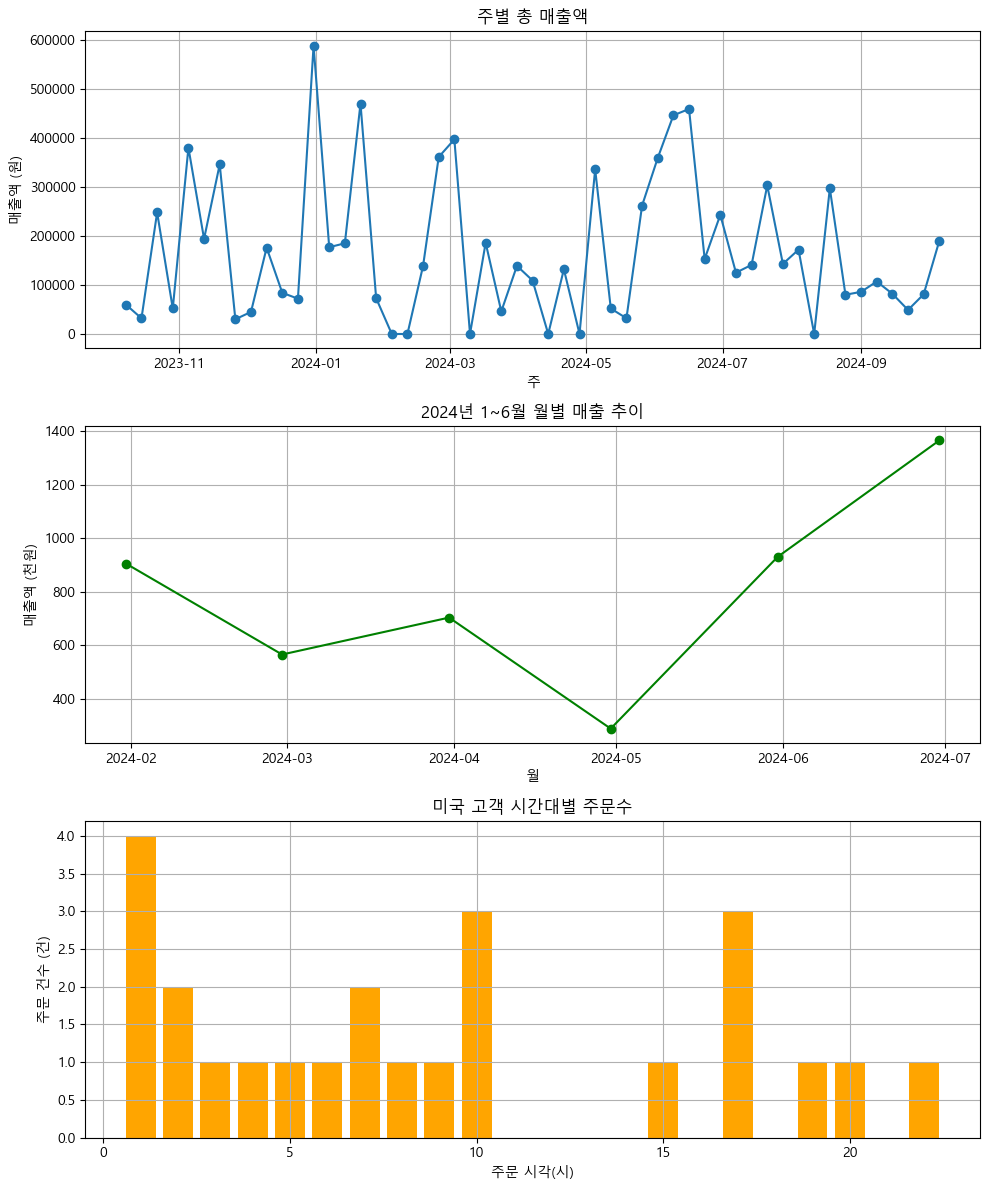

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd

# 한글 폰트 설정
font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 1. 주별 매출액
df.set_index('OrderDate', inplace=True)
weekly_sales = df['TotalRevenue'].resample('W').sum()

# 2. 2024년 1~6월 월별 매출 추이 (천원 단위로 변환)
mask = (df.index >= '2024-01-01') & (df.index < '2024-07-01')
jan_jun_df = df.loc[mask]
monthly_trend = jan_jun_df['TotalRevenue'].resample('M').sum() / 1000  # <- 천원 단위

# 3. 미국 시간대별 주문수
usa_df = df[df['Country'] == '미국'].copy()
usa_df['OrderHour'] = usa_df.index.hour
hourly_orders = usa_df['OrderHour'].value_counts().sort_index()

# 3개 subplot
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 1. 주별 매출액
axes[0].plot(weekly_sales.index, weekly_sales.values, marker='o')
axes[0].set_title('주별 총 매출액')
axes[0].set_xlabel('주')
axes[0].set_ylabel('매출액 (원)')
axes[0].grid(True)

# 2. 2024년 1~6월 월별 매출 추이 (천원 단위)
axes[1].plot(monthly_trend.index, monthly_trend.values, marker='o', color='green')
axes[1].set_title('2024년 1~6월 월별 매출 추이')
axes[1].set_xlabel('월')
axes[1].set_ylabel('매출액 (천원)')   # y축 단위 강조!
axes[1].grid(True)

# 3. 미국 시간대별 주문수
axes[2].bar(hourly_orders.index, hourly_orders.values, color='orange')
axes[2].set_title('미국 고객 시간대별 주문수')
axes[2].set_xlabel('주문 시각(시)')
axes[2].set_ylabel('주문 건수 (건)')
axes[2].grid(True)

plt.tight_layout()
plt.show()
df.reset_index(inplace=True)

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [8]:
order_counts = df.groupby('CustomerID')['OrderID'].count()
repeat_rate = (order_counts > 1).sum() / order_counts.count()
print(f"재구매율: {repeat_rate:.2%}")

# 할인율 상위 25% 기준(quantile 사용)
high_discount = df['DiscountRate'] >= df['DiscountRate'].quantile(0.75)
high_discount_sales = df[high_discount]

cat_high_discount_sales = high_discount_sales.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False)
print(cat_high_discount_sales)

재구매율: 8.11%
Category
Beauty         616000
Electronics    564000
Food           515000
Sports         461000
Clothing       405000
Books          368000
Name: TotalRevenue, dtype: int64
